# Laboratorio 1

- Daniel Alfredo Rayo Roldan
- Gerardo Pineda Riveiro

## Repo:
https://github.com/DanielRasho/DS-Lab1.git

In [83]:
# pip install openpyxl instalar esto
import rdata
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.tsa as tsa
import statsmodels as sm
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa as tsa
import statsmodels as sm
from datetime import datetime
import os
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error


from keras.models import Sequential,save_model,load_model
from keras.layers import Dense
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from keras.metrics import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
import keras

## Cargado de datos

### Consumo de Gas Licuado

In [84]:
hoja_df = pd.read_excel("./data/CONSUMO-HIDROCARBUROS-2024-12.xlsx", header=6)

hoja_df = hoja_df.iloc[:-3]

hoja_df["Fecha"] = pd.to_datetime(hoja_df["Fecha"])
hoja_df["Año"] = hoja_df["Fecha"].dt.year
hoja_df["Mes"] = hoja_df["Fecha"].dt.month

test_2023_2024 = hoja_df[hoja_df["Año"].isin([2023, 2024])][["Fecha", "Gas licuado de petróleo"]]

hoja_df = pd.read_excel("./data/CONSUMO-HIDROCARBUROS-2024-12.xlsx", header=6)

hoja_df = hoja_df.iloc[:-3]

hoja_df["Fecha"] = pd.to_datetime(hoja_df["Fecha"])
hoja_df["Año"] = hoja_df["Fecha"].dt.year
hoja_df["Mes"] = hoja_df["Fecha"].dt.month

test_2023_2024 = hoja_df[hoja_df["Año"].isin([2023, 2024])][["Fecha", "Gas licuado de petróleo"]]

train_data = hoja_df[hoja_df["Año"] < 2023][["Fecha", "Gas licuado de petróleo"]] # [hoja_df["Año"] < 2025]
train_data["Fecha"] = pd.to_datetime(train_data["Fecha"])
train_data["Año"] = train_data["Fecha"].dt.year
train_data["Mes"] = train_data["Fecha"].dt.month
train_data = train_data[~train_data["Año"].isin([2023, 2024, 2025])]
train_data

,Fecha,Gas licuado de petróleo,Año,Mes
0,2000-01-01,194410.476190,2000,1
1,2000-02-01,174710.552381,2000,2
2,2000-03-01,189234.066667,2000,3
3,2000-04-01,174330.607143,2000,4
4,2000-05-01,191745.147619,2000,5
...,...,...,...,...
271,2022-08-01,541273.940000,2022,8
272,2022-09-01,479529.680000,2022,9
273,2022-10-01,545823.450000,2022,10
274,2022-11-01,528393.770000,2022,11


In [85]:
train_data = train_data.set_index('Fecha').sort_index()

series = train_data['Gas licuado de petróleo'].diff().fillna(0,inplace=True)
print(series)

print('Resultados del Test de Dickey Fuller para una diferenciación de la serie')
ts_air_pas_diff = train_data["Gas licuado de petróleo"].diff()
ts_air_pas_diff.dropna(inplace=True)
dfTest = adfuller(ts_air_pas_diff)
salidaDf = pd.Series(dfTest[0:4], index=['Estadístico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key,value in dfTest[4].items():
        salidaDf['Critical Value (%s)'%key] = value
print(salidaDf)

None
Resultados del Test de Dickey Fuller para una diferenciación de la serie
Estadístico de prueba         -3.441399
p-value                        0.009626
# de retardos usados          16.000000
# de observaciones usadas    258.000000
Critical Value (1%)           -3.455953
Critical Value (5%)           -2.872809
Critical Value (10%)          -2.572775
dtype: float64


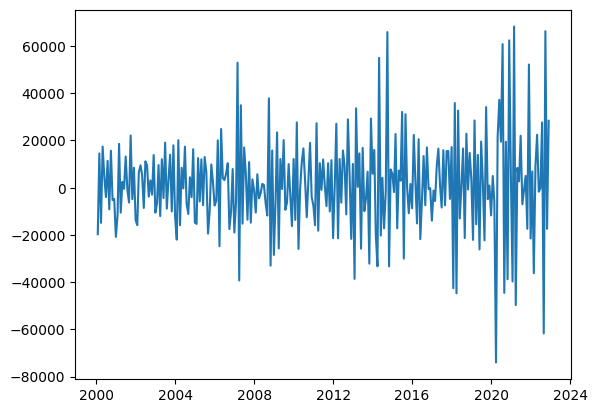

In [86]:
plt.plot(ts_air_pas_diff)

In [87]:
df = ts_air_pas_diff.to_frame()
print(df.columns) 


Index(['Gas licuado de petróleo'], dtype='object')


In [88]:
scaler = StandardScaler()
ts_air_pas_scaled = scaler.fit_transform(df[["Gas licuado de petróleo"]])
ts_air_pas_scaled[1:7]

array([[ 0.64523612],
       [-0.79254977],
       [ 0.78649009],
       [ 0.15924439],
       [-0.25870997],
       [ 0.49177172]])

In [89]:
entrenamiento = round(0.6*len(ts_air_pas_scaled))
val_prueba = round(0.2*len(ts_air_pas_scaled))
test = ts_air_pas_scaled[(entrenamiento+val_prueba)-1:]
validation = ts_air_pas_scaled[(entrenamiento):entrenamiento+val_prueba+1]
train = ts_air_pas_scaled[0:entrenamiento]
train=np.insert(train,0,0)
train=np.reshape(train,(train.shape[0],1))
len(test)

56

In [90]:
x_train = np.reshape(x_train,(x_train.shape[0],1,1))
x_val = np.reshape(x_val, (x_val.shape[0],1,1))
x_test = np.reshape(x_test, (x_test.shape[0],1,1))
len(x_val)

55

In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

modelo1 = Sequential()
lote = 1
unidades = 1
paso = 1
caracteristicas = 1  # univariada

modelo1.add(Input(batch_shape=(lote, paso, caracteristicas)))
modelo1.add(LSTM(units=unidades, stateful=True))
modelo1.add(Dense(1))

modelo1.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (1, 1)                 │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (1, 1)                 │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14 (56.00 B)

 Trainable params: 14 (56.00 B)

 Non-trainable params: 0 (0.00 B)

In [92]:
modelo1.compile(loss='mean_squared_error',optimizer="rmsprop")

In [93]:
epocas = 30
history= modelo1.fit(
    x = x_train,
    y = y_train,
    batch_size = lote,
    epochs = epocas,
    shuffle = False,
    validation_data = (x_val,y_val),
    verbose=1
)

Epoch 1/30
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6207 - val_loss: 1.5061
Epoch 2/30
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5713 - val_loss: 1.4282
Epoch 3/30
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5398 - val_loss: 1.3665
Epoch 4/30
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5170 - val_loss: 1.3157
Epoch 5/30
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4990 - val_loss: 1.2730
Epoch 6/30
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4841 - val_loss: 1.2367
Epoch 7/30
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4714 - val_loss: 1.2054
Epoch 8/30
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4604 - val_loss: 1.1771
Epoch 9/30
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4506 - val_loss: 1.1505
Epoch 10/30
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4415 - val_loss: 1.1243
Epoch 11/30
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4328 - val_loss: 1.0979
Epoch 12/30
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

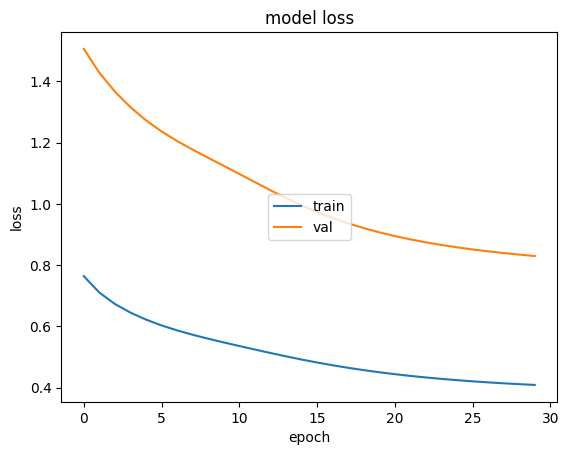

In [94]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='center')

In [95]:
from operator import concat


def supervisada(serie,retrasos = 1):
    serie_x = []
    serie_y = []
    for i in range(len(serie)-retrasos):
        valor = serie[i:(i+retrasos),0]
        valor_sig = serie[i+retrasos,0]
        serie_x.append(valor)
        serie_y.append(valor_sig)
    return np.array(serie_x), np.array(serie_y)

x_train,y_train = supervisada(train)
x_val,y_val = supervisada(validation)
x_test,y_test = supervisada(test)



In [96]:
modelo1.evaluate(x_train, y_train, batch_size=1)
modelo1.evaluate(x_val, y_val, batch_size=1)
modelo1.evaluate(x_test, y_test, batch_size=1)


ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None
  • kwargs=<class 'inspect._empty'>

In [ ]:
prediccion_val = []

def prediccion_fun(data,modelo, batch_size,scaler,dif=False,dif_cant=1, Series = None , n=1):
    prediccion = [0]* (len(data))
    i=0
    for X in data:
        X = np.reshape(X,(1,1,1))
        yhat = modelo1.predict(X, batch_size=batch_size,verbose=0)
        # invert scaling
        yhat = scaler.inverse_transform(yhat)
        if dif:
             # invert differencing
            yhat  = yhat + Series[(n+dif_cant*i)]
        # store
        prediccion[i]=yhat[0][0]
        i = i+1
    return prediccion
prediccion_val = prediccion_fun(x_val,modelo1, 1,scaler,dif=True,dif_cant=1, Series = df["Gas licuado de petróleo"].values , n=entrenamiento)
prediccion_test = prediccion_fun(x_test,modelo1, 1,scaler,dif=True,dif_cant=1, Series = df["Gas licuado de petróleo"].values , n=entrenamiento+val_prueba)


In [ ]:
df_val = pd.DataFrame(prediccion_val,
                      index=df[["Gas licuado de petróleo"]].iloc[entrenamiento:entrenamiento + len(prediccion_val)].index)

start = entrenamiento + len(prediccion_val)
end = start + len(prediccion_test)
df_test = pd.DataFrame(prediccion_test,
                       index=df[["Gas licuado de petróleo"]].iloc[start:end].index)


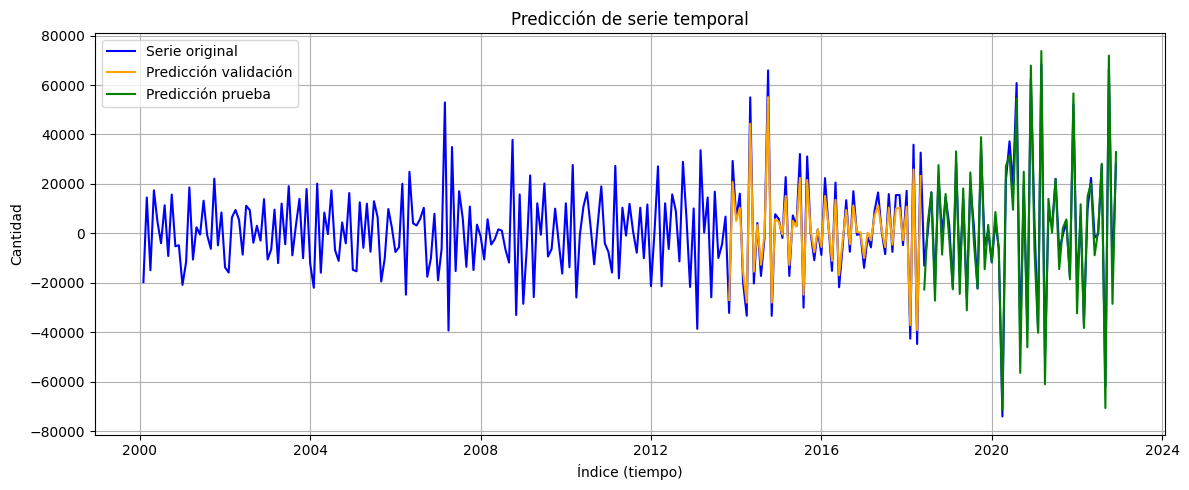

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))  

plt.plot(df[["Gas licuado de petróleo"]], label="Serie original", color="blue")

plt.plot(df_val, label="Predicción validación", color="orange")

plt.plot(df_test, label="Predicción prueba", color="green")

plt.title("Predicción de serie temporal")
plt.xlabel("Índice (tiempo)")
plt.ylabel("Cantidad")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


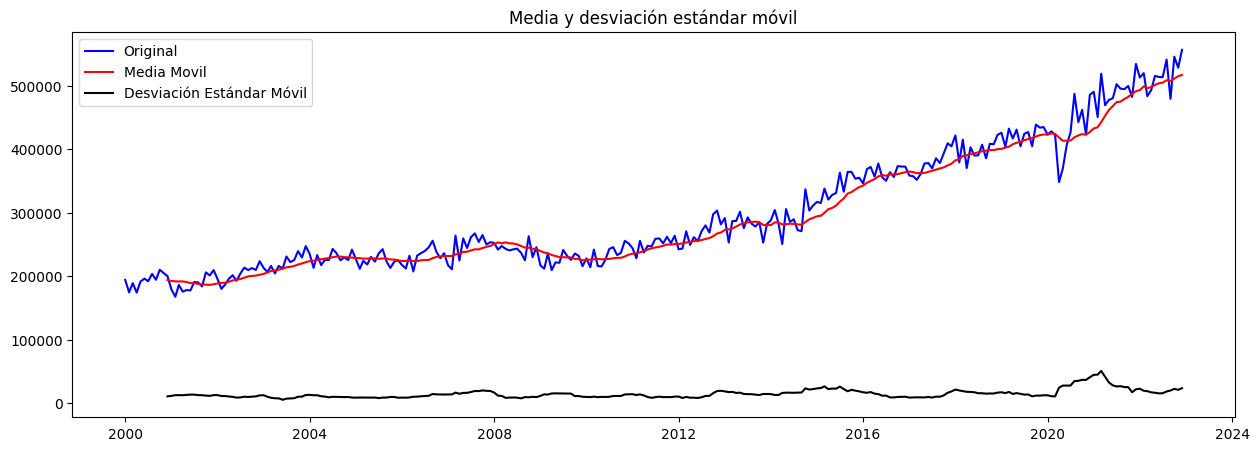

In [ ]:
# Se calcula la media móvil y la desviación estandar móvil de los últimos 12 meses.
mediaMovil = train_data["Gas licuado de petróleo"].rolling(window=12).mean()
deMovil = train_data["Gas licuado de petróleo"].rolling(window=12).std()
# Se grafican los resultados.
original = plt.plot(train_data["Gas licuado de petróleo"], color="blue", label="Original")
media = plt.plot(mediaMovil, color='red', label = 'Media Movil')
ds = plt.plot(deMovil,color='black', label = 'Desviación Estándar Móvil')
plt.legend(loc = 'best')
plt.title('Media y desviación estándar móvil')
plt.show(block=False)

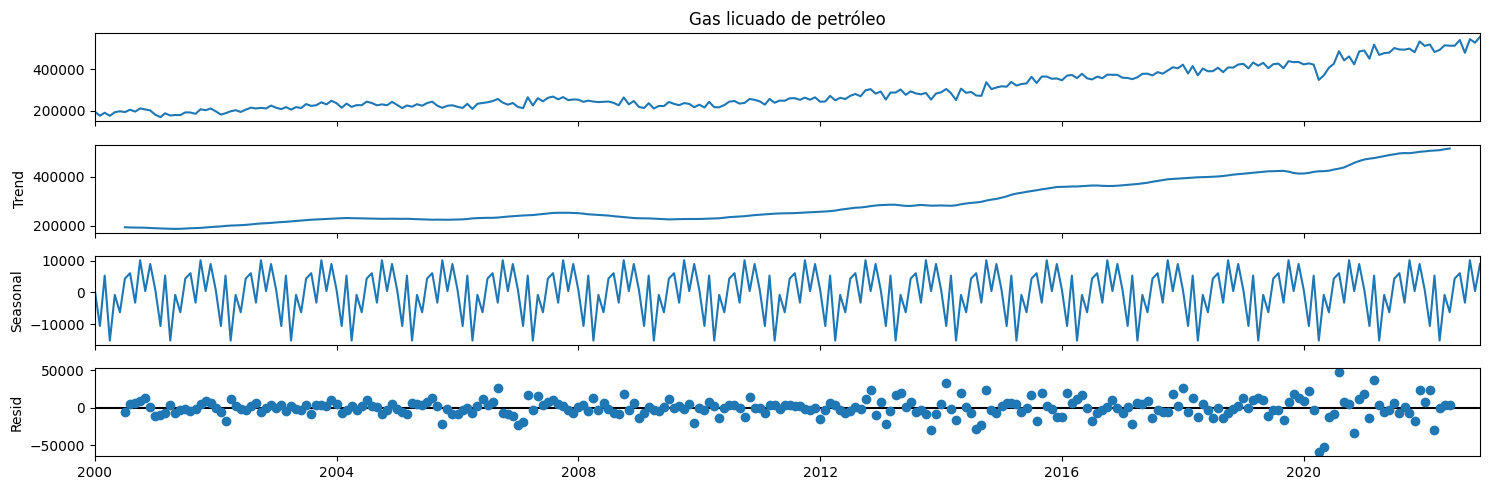

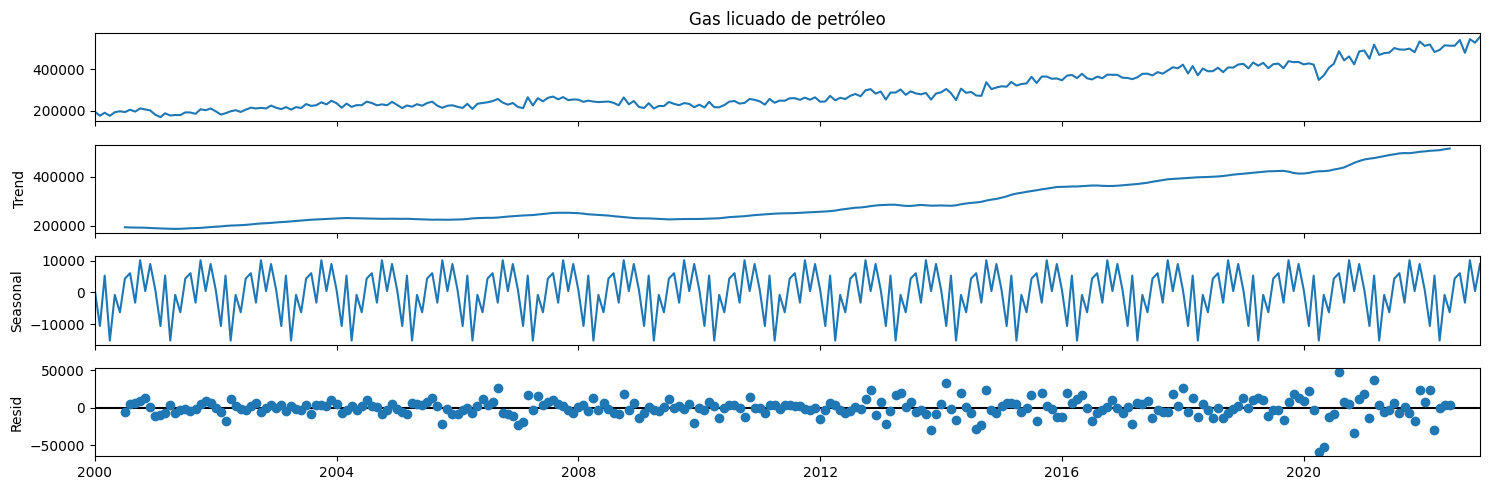

In [ ]:
descomposicion = seasonal_decompose(train_data["Gas licuado de petróleo"])
descomposicion.plot()

Se puede observar como muestra una tendencia creciente constante. Se puede observar como existe una demanda sostenida y en aumento de gas licuado a lo largo de los años. Se puede observar como si existe una estacionalidad. La varianza de los residuos parece estable, lo que sugiere que el modelo de descomposición ha capturado correctamente la tendencia y la estacionalidad. A pesar de todo ese, se puede concluirq ue no es estacionaria media por la tendencia. No es tacionaria en varianza, porque la amplitur parace crecer levemente en los años.

In [ ]:
print('Resultados del Test de Dickey Fuller')
dfTest = adfuller(train_data["Gas licuado de petróleo"], autolag='AIC')
salidaDf = pd.Series(dfTest[0:4], index=['Estadístico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key,value in dfTest[4].items():
        salidaDf['Critical Value (%s)'%key] = value
print(salidaDf)

Resultados del Test de Dickey Fuller
Estadístico de prueba          2.641345
p-value                        0.999082
# de retardos usados          11.000000
# de observaciones usadas    264.000000
Critical Value (1%)           -3.455365
Critical Value (5%)           -2.872551
Critical Value (10%)          -2.572638
dtype: float64


In [ ]:
print('Resultados del Test de Dickey Fuller para una diferenciación de la serie')
ts_air_pas_diff = train_data["Gas licuado de petróleo"].diff()
ts_air_pas_diff.dropna(inplace=True)
dfTest = adfuller(ts_air_pas_diff)
salidaDf = pd.Series(dfTest[0:4], index=['Estadístico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key,value in dfTest[4].items():
        salidaDf['Critical Value (%s)'%key] = value
print(salidaDf)

Resultados del Test de Dickey Fuller para una diferenciación de la serie
Estadístico de prueba         -3.441399
p-value                        0.009626
# de retardos usados          16.000000
# de observaciones usadas    258.000000
Critical Value (1%)           -3.455953
Critical Value (5%)           -2.872809
Critical Value (10%)          -2.572775
dtype: float64


con una diferencia es estacionaria en media

# Consumo de Gasolina Super

In [99]:
hoja_df = pd.read_excel("./data/CONSUMO-HIDROCARBUROS-2024-12.xlsx", header=6)

hoja_df = hoja_df.iloc[:-3]

hoja_df["Fecha"] = pd.to_datetime(hoja_df["Fecha"])
hoja_df["Año"] = hoja_df["Fecha"].dt.year
hoja_df["Mes"] = hoja_df["Fecha"].dt.month

test_2023_2024 = hoja_df[hoja_df["Año"].isin([2023, 2024])][["Fecha", "Gasolina superior"]]

In [100]:
train_data = hoja_df[hoja_df["Año"] < 2023][["Fecha", "Gasolina superior"]] # [hoja_df["Año"] < 2025]
train_data["Fecha"] = pd.to_datetime(train_data["Fecha"])
train_data["Año"] = train_data["Fecha"].dt.year
train_data["Mes"] = train_data["Fecha"].dt.month
train_data = train_data[~train_data["Año"].isin([2023, 2024, 2025])]
train_data


,Fecha,Gasolina superior,Año,Mes
0,2000-01-01,308156.82,2000,1
1,2000-02-01,307766.31,2000,2
2,2000-03-01,331910.29,2000,3
3,2000-04-01,315648.08,2000,4
4,2000-05-01,319667.97,2000,5
...,...,...,...,...
271,2022-08-01,581844.42,2022,8
272,2022-09-01,570632.20,2022,9
273,2022-10-01,573943.48,2022,10
274,2022-11-01,572163.23,2022,11


In [102]:
train_data = hoja_df[hoja_df["Año"] < 2023][["Fecha", "Gasolina superior"]] # [hoja_df["Año"] < 2025]
train_data["Fecha"] = pd.to_datetime(train_data["Fecha"])
train_data["Año"] = train_data["Fecha"].dt.year
train_data["Mes"] = train_data["Fecha"].dt.month
train_data = train_data[~train_data["Año"].isin([2023, 2024, 2025])]
train_data

,Fecha,Gasolina superior,Año,Mes
0,2000-01-01,308156.82,2000,1
1,2000-02-01,307766.31,2000,2
2,2000-03-01,331910.29,2000,3
3,2000-04-01,315648.08,2000,4
4,2000-05-01,319667.97,2000,5
...,...,...,...,...
271,2022-08-01,581844.42,2022,8
272,2022-09-01,570632.20,2022,9
273,2022-10-01,573943.48,2022,10
274,2022-11-01,572163.23,2022,11


In [104]:
hoja_df_2025 = pd.read_excel("./data/VENTAS-HIDROCARBUROS-2025-05.xlsx", header=6)
hoja_df_2025 = hoja_df_2025.iloc[:-3]

hoja_df_2025["Fecha"] = pd.to_datetime(hoja_df_2025["Fecha"])
hoja_df_2025["Año"] = hoja_df_2025["Fecha"].dt.year
hoja_df_2025["Mes"] = hoja_df_2025["Fecha"].dt.month

test_2025 = hoja_df_2025[["Fecha", "Gasolina superior"]]
test_data = pd.concat([test_2023_2024, test_2025], ignore_index=True)
test_data.set_index("Fecha", inplace=True)

In [105]:
train_data = train_data.copy()
train_data["Fecha"] = pd.to_datetime(train_data["Fecha"])
train_data.set_index("Fecha", inplace=True)

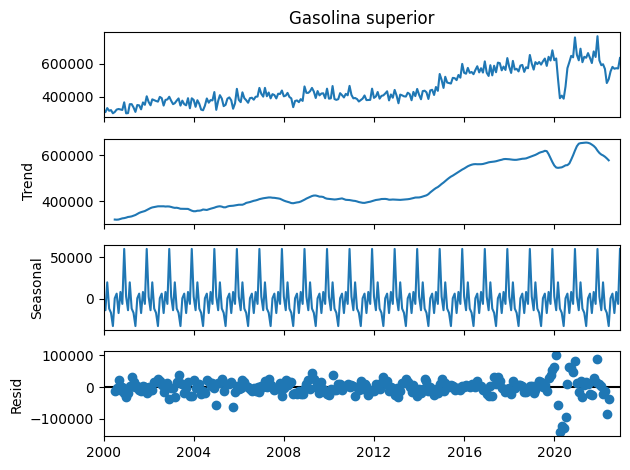

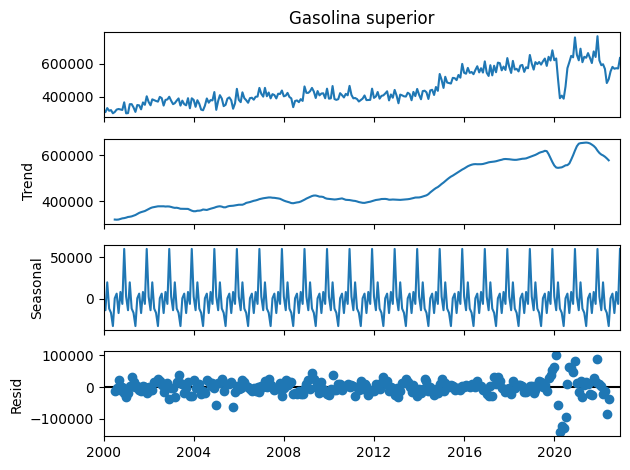

In [106]:
descomposicion = seasonal_decompose(train_data["Gasolina superior"])
descomposicion.plot()

In [107]:
print('Resultados del Test de Dickey Fuller')
dfTest = adfuller(train_data["Gasolina superior"], autolag='AIC')
salidaDf = pd.Series(dfTest[0:4], index=['Estadístico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key,value in dfTest[4].items():
        salidaDf['Critical Value (%s)'%key] = value
print(salidaDf)

Resultados del Test de Dickey Fuller
Estadístico de prueba         -1.268840
p-value                        0.643305
# de retardos usados          12.000000
# de observaciones usadas    263.000000
Critical Value (1%)           -3.455461
Critical Value (5%)           -2.872593
Critical Value (10%)          -2.572660
dtype: float64


In [108]:
print('Resultados del Test de Dickey Fuller para una diferenciación de la serie')
ts_air_pas_diff = train_data["Gasolina superior"].diff()
ts_air_pas_diff.dropna(inplace=True)
dfTest = adfuller(ts_air_pas_diff)
salidaDf = pd.Series(dfTest[0:4], index=['Estadístico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key,value in dfTest[4].items():
        salidaDf['Critical Value (%s)'%key] = value
print(salidaDf)

Resultados del Test de Dickey Fuller para una diferenciación de la serie
Estadístico de prueba       -5.787650e+00
p-value                      4.956215e-07
# de retardos usados         1.100000e+01
# de observaciones usadas    2.630000e+02
Critical Value (1%)         -3.455461e+00
Critical Value (5%)         -2.872593e+00
Critical Value (10%)        -2.572660e+00
dtype: float64


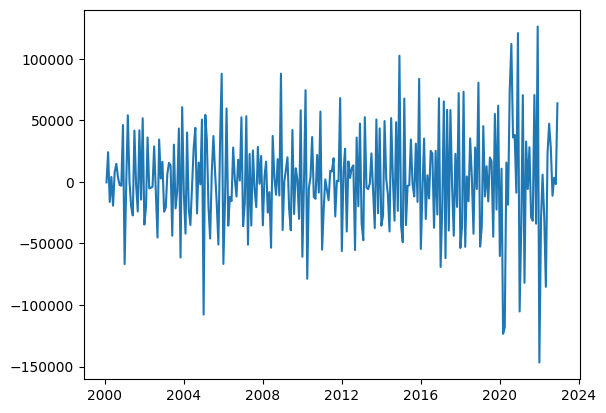

In [109]:
plt.plot(ts_air_pas_diff)

In [110]:
df = ts_air_pas_diff.to_frame()  # nombre por defecto será el nombre de la serie
print(df.columns)  # debería dar ['Gasolina superior'] o similar

Index(['Gasolina superior'], dtype='object')


In [111]:
scaler = StandardScaler()
ts_air_pas_scaled = scaler.fit_transform(df[["Gasolina superior"]])
ts_air_pas_scaled[1:7]

array([[ 0.55337278],
       [-0.4208209 ],
       [ 0.06818075],
       [-0.49455076],
       [ 0.16313417],
       [ 0.32582129]])

In [112]:
entrenamiento = round(0.6*len(ts_air_pas_scaled))
val_prueba = round(0.2*len(ts_air_pas_scaled))
test = ts_air_pas_scaled[(entrenamiento+val_prueba)-1:]
validation = ts_air_pas_scaled[(entrenamiento):entrenamiento+val_prueba+1]
train = ts_air_pas_scaled[0:entrenamiento]
train=np.insert(train,0,0)
train=np.reshape(train,(train.shape[0],1))
len(test)

56

In [113]:
from operator import concat


def supervisada(serie,retrasos = 1):
    serie_x = []
    serie_y = []
    for i in range(len(serie)-retrasos):
        valor = serie[i:(i+retrasos),0]
        valor_sig = serie[i+retrasos,0]
        serie_x.append(valor)
        serie_y.append(valor_sig)
    return np.array(serie_x), np.array(serie_y)

x_train,y_train = supervisada(train)
x_val,y_val = supervisada(validation)
x_test,y_test = supervisada(test)



In [114]:
x_train = np.reshape(x_train,(x_train.shape[0],1,1))
x_val = np.reshape(x_val, (x_val.shape[0],1,1))
x_test = np.reshape(x_test, (x_test.shape[0],1,1))
len(x_val)

55

In [115]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

modelo1 = Sequential()
lote = 1
unidades = 1
paso = 1
caracteristicas = 1  # univariada

modelo1.add(Input(batch_shape=(lote, paso, caracteristicas)))
modelo1.add(LSTM(units=unidades, stateful=True))
modelo1.add(Dense(1))

modelo1.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (1, 1)                 │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (1, 1)                 │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14 (56.00 B)

 Trainable params: 14 (56.00 B)

 Non-trainable params: 0 (0.00 B)

In [116]:
modelo1.compile(loss='mean_squared_error',optimizer="rmsprop")

In [117]:
epocas = 95
history= modelo1.fit(
    x = x_train,
    y = y_train,
    batch_size = lote,
    epochs = epocas,
    shuffle = False,
    validation_data = (x_val,y_val),
    verbose=1
)

Epoch 1/95
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6402 - val_loss: 1.1834
Epoch 2/95
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6248 - val_loss: 1.1586
Epoch 3/95
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6130 - val_loss: 1.1375
Epoch 4/95
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6033 - val_loss: 1.1193
Epoch 5/95
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5953 - val_loss: 1.1035
Epoch 6/95
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5885 - val_loss: 1.0899
Epoch 7/95
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5828 - val_loss: 1.0788
Epoch 8/95
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5783 - val_loss: 1.0704
Epoch 9/95
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5752 - val_loss: 1.0647
Epoch 10/95
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5732 - val_loss: 1.0615
Epoch 11/95
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5720 - val_loss: 1.0595
Epoch 12/95
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

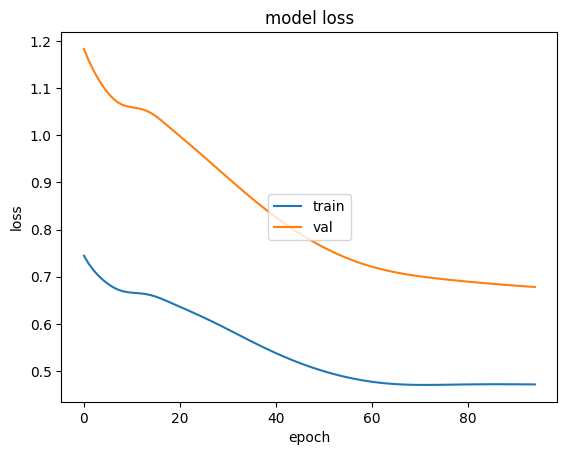

In [118]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='center')

In [119]:
modelo1.evaluate(x_train, y_train, batch_size=1)
modelo1.evaluate(x_val, y_val, batch_size=1)
modelo1.evaluate(x_test, y_test, batch_size=1)

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4204
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6603  
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3295 


1.9374698400497437

In [120]:
prediccion_val = []

def prediccion_fun(data,modelo, batch_size,scaler,dif=False,dif_cant=1, Series = None , n=1):
    prediccion = [0]* (len(data))
    i=0
    for X in data:
        X = np.reshape(X,(1,1,1))
        yhat = modelo1.predict(X, batch_size=batch_size,verbose=0)
        # invert scaling
        yhat = scaler.inverse_transform(yhat)
        if dif:
             # invert differencing
            yhat  = yhat + Series[(n+dif_cant*i)]
        # store
        prediccion[i]=yhat[0][0]
        i = i+1
    return prediccion
prediccion_val = prediccion_fun(x_val,modelo1, 1,scaler,dif=True,dif_cant=1, Series = df[["Gasolina superior"]].values , n=entrenamiento)
prediccion_test = prediccion_fun(x_test,modelo1, 1,scaler,dif=True,dif_cant=1, Series = df[["Gasolina superior"]].values , n=entrenamiento+val_prueba)


In [121]:
df_val = pd.DataFrame(prediccion_val,
                      index=df[["Gasolina superior"]].iloc[entrenamiento:entrenamiento + len(prediccion_val)].index)

start = entrenamiento + len(prediccion_val)
end = start + len(prediccion_test)
df_test = pd.DataFrame(prediccion_test,
                       index=df[["Gasolina superior"]].iloc[start:end].index)


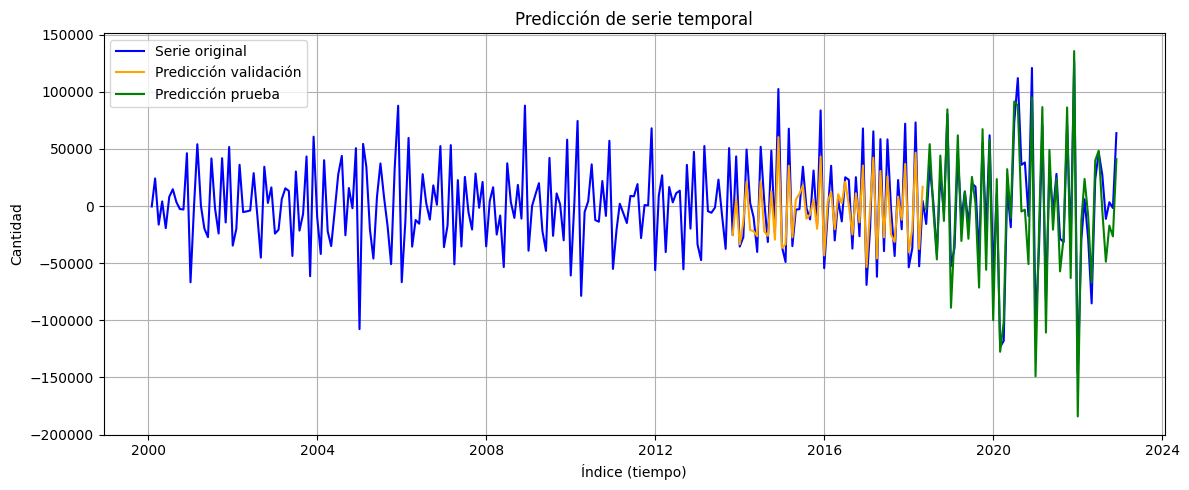

In [122]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))  

plt.plot(df[["Gasolina superior"]], label="Serie original", color="blue")

plt.plot(df_val, label="Predicción validación", color="orange")

plt.plot(df_test, label="Predicción prueba", color="green")

plt.title("Predicción de serie temporal")
plt.xlabel("Índice (tiempo)")
plt.ylabel("Cantidad")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()
